# Project: Business Public Sentiment

Design a model to predict the sentiment (positive or negative) of text and apply it to the twitter feed of a business.


## Structure

Take a look at the files in the directory to better understand the structure of the project. 

- `data/`: Folder containing the training and test data.
- `models/`: Folder containing models.
    - `baseline_model.py`: A baseline model to start with.
    - `model.py`: The final model.


## Understanding the data-set

The training data was in a single cvs file which was over 200M in size so I've split the file into smaller files for easy of use. You can also see the testdata which is very small relative to the amount of training data.

In [2]:
print("List all the files in the data directory\n")
!ls data

List all the files in the data directory

splitfile_1.csv
splitfile_10.csv
splitfile_11.csv
splitfile_12.csv
splitfile_13.csv
splitfile_14.csv
splitfile_15.csv
splitfile_16.csv
splitfile_2.csv
splitfile_3.csv
splitfile_4.csv
splitfile_5.csv
splitfile_6.csv
splitfile_7.csv
splitfile_8.csv
splitfile_9.csv
testdata.manual.2009.06.14.csv


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
# Load the data
dataframe = pd.read_csv("data/training.1600000.processed.noemoticon.csv", sep=',', names=['labels','id', 'data', 'query', 'user', 'text'], encoding='ISO-8859-1', header=None)
dataframe.head()

,labels,id,data,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A9575B7F0>,
      dtype=object)

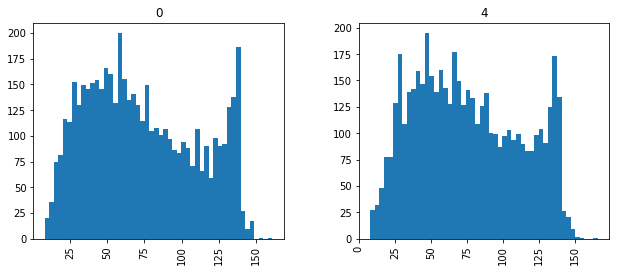

In [5]:
# Preprocess the data and display a histogram of the length of the text
dataframe_subset = dataframe[795000:805000]
dataframe_subset = dataframe_subset.reset_index(drop=True)

twitterData = dataframe_subset.drop(columns=['id', 'data', 'query', 'user'])
twitterLabelledData = dataframe_subset.drop(columns=['id', 'data', 'query', 'user'])

twitterData.groupby('labels').describe()
twitterData['length'] = twitterData['text'].apply(len)
twitterData.hist(column = 'length', by = 'labels', bins = 50, figsize = (10, 4))

In [6]:
# Convert the data to a frequency matrix
twitterText = twitterData.drop(columns=['length', 'labels'])
dfToA = twitterText.values.flatten()
count_vector = CountVectorizer()
count_vector.fit(dfToA)
names = count_vector.get_feature_names()
doc_array = count_vector.transform(dfToA).toarray()

frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix.head()

,00,000,0000r0cx,000th,00am,018,04,0515,06,06fd3,...,½re,½rmï,½s,½se,½stand,½t,½tï,½y,½ï,ã¼ã
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Create, fit and test the baseline model
from models.baseline_model import BaselineModel

baseline_model = BaselineModel(twitterLabelledData)
baseline_model.splitData(p=True)
baseline_model.fitNaiveBayes()
baseline_model.predict()
baseline_model.printScores()

Number of rows in the total set: 10000
Number of rows in the training set: 7500
Number of rows in the test set: 2500
 
   labels                                               text
0       0  Was having dinner with parents downstairs in D...
1       0       Blah 5am still up  daang I got deep problems
2       0  @jenspeedy I would suggest avoiding 360 Living...
3       0  @alexbroun I didn't convince myself I was fat ...
4       0  @spotzle @jstarrh check on sunscreen, snacks, ...
Accuracy score:  0.7728
Precision score:  0.7789029535864979
Recall score:  0.7510170870626526
F1 score:  0.7647058823529411
